#Normalizing and Standardizing

##데이터 스케일Data Scaling 

In [8]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X_train = np.array([[-500.5],
                    [-100.1],
                    [0],
                    [100.1],
                    [900.9]])


# minmax scaler 선언 및 학습
minmaxScaler = MinMaxScaler().fit(X_train)

# train셋 내 feature들에 대하여 minmax scaling 수행
X_train_minmax = minmaxScaler.transform(X_train)

# 특성을 출력합니다.
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

In [1]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn import preprocessing

# 특성을 만듭니다.
feature = np.array([[-500.5],
                    [-100.1],
                    [0],
                    [100.1],
                    [900.9]])

# 스케일러 객체를 만듭니다.
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

# 특성의 스케일을 변환합니다.
scaled_feature = minmax_scale.fit_transform(feature)

# 특성을 출력합니다.
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

In [2]:
# 훈련 세트를 변환합니다.
preprocessing.MinMaxScaler().fit_transform(feature[:3])

array([[0. ],
       [0.8],
       [1. ]])

In [3]:
# 테스트 세트를 변환합니다.
preprocessing.MinMaxScaler().fit_transform(feature[3:])

array([[0.],
       [1.]])

In [4]:
# 훈련 세트로 변환기를 학습합니다.
scaler = preprocessing.MinMaxScaler().fit(feature[:3])
scaler.transform(feature[:3])

array([[0. ],
       [0.8],
       [1. ]])

In [5]:
# 훈련 세트에서 학습한 변환기로 테스트 세트를 변환합니다.
scaler.transform(feature[3:])

array([[1.2],
       [2.8]])

## 특성 표준화

In [9]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn import preprocessing

# 특성을 만듭니다.
x = np.array([[-1000.1],
              [-200.2],
              [500.5],
              [600.6],
              [9000.9]])

# 변환기 객체를 만듭니다.
scaler = preprocessing.StandardScaler()

# 특성을 변환합니다.
standardized = scaler.fit_transform(x)

# 특성을 출력합니다.
standardized

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

In [10]:
# 평균과 표준 편차를 출력합니다.
print("평균 Mean:", round(standardized.mean()))
print("표준 편차 Standard deviation:", standardized.std())

평균 Mean: 0
표준 편차 Standard deviation: 1.0


In [11]:
# 변환기 객체를 만듭니다.
robust_scaler = preprocessing.RobustScaler()

# 특성을 변환합니다.
robust_scaler.fit_transform(x)

array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

In [12]:
interquatile_range = x[3] - x[1]
(x - np.median(x)) / interquatile_range

array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

In [13]:
preprocessing.QuantileTransformer().fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

## 특성 정규화

In [14]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import Normalizer

# 특성 행렬을 만듭니다.
features = np.array([[0.5, 0.5],
                     [1.1, 3.4],
                     [1.5, 20.2],
                     [1.63, 34.4],
                     [10.9, 3.3]])

# 변환기 객체를 만듭니다.
normalizer = Normalizer(norm="l2")

# 특성 행렬을 변환합니다.
normalizer.transform(features)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

In [15]:
# 특성 행렬을 변환합니다.
features_l2_norm = Normalizer(norm="l2").transform(features)

# 특성 행렬을 출력합니다.
features_l2_norm

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

In [16]:
# 특성 행렬을 변환합니다.
features_l1_norm = Normalizer(norm="l1").transform(features)

# 특성 행렬을 출력합니다.
features_l1_norm

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

In [17]:
# 합을 출력합니다.
print("첫 번째 샘플 값의 합:",
   features_l1_norm[0, 0] + features_l1_norm[0, 1])

첫 번째 샘플 값의 합: 1.0


In [18]:
# L1 노름을 사용한 변환.
# 각 행(axis=1)을 합한 결과가 2차원 배열로 유지되도록 keepdims를 True로 설정합니다.
features / np.sum(np.abs(features), axis=1, keepdims=True)

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

In [19]:
# L2 노름을 사용한 변환.
features / np.sqrt(np.sum(np.square(features), axis=1, keepdims=True))

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

In [20]:
# 각 행에서 최댓값으로 나눕니다.
Normalizer(norm="max").transform(features)

array([[1.        , 1.        ],
       [0.32352941, 1.        ],
       [0.07425743, 1.        ],
       [0.04738372, 1.        ],
       [1.        , 0.30275229]])

### 다항 특성과 교차항 특성 생성하기

In [21]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 특성 행렬을 만듭니다.
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

# PolynomialFeatures 객체를 만듭니다.
polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)

# 다항 특성을 만듭니다.
polynomial_interaction.fit_transform(features)

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

In [22]:
interaction = PolynomialFeatures(degree=2, 
                                 interaction_only=True, include_bias=False)
interaction.fit_transform(features)

array([[2., 3., 6.],
       [2., 3., 6.],
       [2., 3., 6.]])

In [23]:
# 상수항 1을 추가합니다.
polynomial_bias = PolynomialFeatures(degree=2, include_bias=True).fit(features)
polynomial_bias.transform(features)

array([[1., 2., 3., 4., 6., 9.],
       [1., 2., 3., 4., 6., 9.],
       [1., 2., 3., 4., 6., 9.]])

In [24]:
polynomial_bias.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

### 하나 이상의 특성에 사용자 정의 변환을 적용

In [25]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# 특성 행렬을 만듭니다.
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

# 간단한 함수를 정의합니다.
def add_ten(x):
    return x + 10

# 변환기 객체를 만듭니다.
ten_transformer = FunctionTransformer(add_ten)

# 특성 행렬을 변환합니다.
ten_transformer.transform(features)

array([[12, 13],
       [12, 13],
       [12, 13]])

In [26]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
df = pd.DataFrame(features, columns=["feature_1", "feature_2"])

# 함수를 적용합니다.
df.apply(add_ten)

,feature_1,feature_2
0,12,13
1,12,13
2,12,13


In [27]:
FunctionTransformer(add_ten, validate=False).transform(np.array([1, 2, 3]))

array([11, 12, 13])

In [28]:
from sklearn.compose import ColumnTransformer

# 100을 더하는 함수를 만듭니다.
def add_hundred(x):
    return x + 100

# (이름, 변환기, 열 리스트)로 구성된 튜플의 리스트를 ColumnTransformer에 전달합니다.
ct = ColumnTransformer(
    [("add_ten", FunctionTransformer(add_ten, validate=True), ['feature_1']),
     ("add_hundred", FunctionTransformer(add_hundred, validate=True), ['feature_2'])])

ct.fit_transform(df)

array([[ 12, 103],
       [ 12, 103],
       [ 12, 103]])

In [29]:
import pandas as pd
df = pd.DataFrame({
'category': ['fruits','fruits','fruits','fruits','fruits','vegetables','vegetables','vegetables','vegetables','vegetables'],
'product' : ['apple','orange','durian','coconut','grape','cabbage','carrot','spinach','grass','potato'],
'sales'   : [10,20,30,40,100,10,30,50,60,100]
})
df.head()



from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_fruits = df[df['category'] == "fruits"]
df_fruits['sales'] = scaler.fit_transform(df_fruits[['sales']])
df_fruits.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,category,product,sales
0,fruits,apple,0.000000
1,fruits,orange,0.111111
2,fruits,durian,0.222222
3,fruits,coconut,0.333333
4,fruits,grape,1.000000


# 차원 축소

## 특성 추출과 차원 축소

### 주성분 분석(Principal Component Analysis, PCA)

In [30]:
# 라이브러리를 임포트합니다.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 표준화 처리합니다.
features = StandardScaler().fit_transform(digits.data)

# 99%의 분산을 유지하도록 PCA 클래스 객체를 만듭니다.
pca = PCA(n_components=0.99, whiten=True)

# PCA를 수행합니다.
features_pca = pca.fit_transform(features)

# 결과를 확인합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_pca.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 54


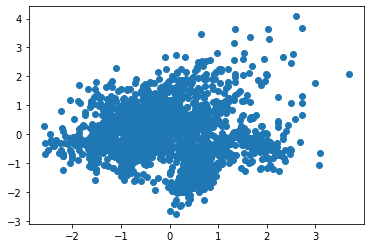

In [31]:
import matplotlib.pyplot as plt

plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.show()

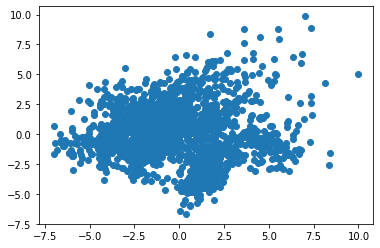

In [32]:
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:, 0], features_nowhiten[:, 1])
plt.show()

In [33]:
pca_nowhiten.components_.shape

(54, 64)

In [34]:
import numpy as np

np.allclose(features_nowhiten, np.dot(features, pca_nowhiten.components_.T))

True

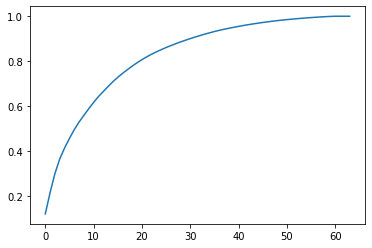

In [35]:
pca = PCA(whiten=True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

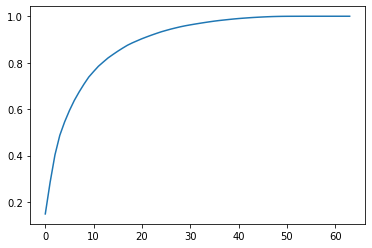

In [36]:
# 표준화하지 않은 원본 데이터를 사용합니다.
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

### 선형적으로 구분되지 않는 데이터의 차원을 축소하기

#### Kernel trick을 사용한 주성분 분석


In [37]:
# 라이브러리를 임포트합니다.
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# 선형적으로 구분되지 않는 데이터를 만듭니다.
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

# 방사 기저 함수(radius basis function, RBF)를 사용하여 커널 PCA를 적용합니다.
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kpca.shape[1])

원본 특성 개수: 2
줄어든 특성 개수: 1


In [38]:
kpca.components_

AttributeError: ignored

### 클래스 분리를 최대화함으로써 특성을 줄이기

#### LDA(linear discriminant analysis)


In [39]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 붓꽃 데이터셋을 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# LDA 객체를 만들고 실행하여 특성을 변환합니다.
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

# 특성 개수를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_lda.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 1


In [40]:
lda.explained_variance_ratio_

array([0.9912126])

In [41]:
# LDA를 만들고 실행합니다.
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)

# 설명된 분산의 비율이 담긴 배열을 저장합니다.
lda_var_ratios = lda.explained_variance_ratio_

# 함수를 만듭니다.
def select_n_components(var_ratio, goal_var: float) -> int:
    # 설명된 분산의 초기값을 지정합니다.
    total_variance = 0.0

    # 특성 개수의 초깃값을 지정합니다.
    n_components = 0

    # 각 특성의 설명된 분산을 순회합니다.
    for explained_variance in var_ratio:

        # 설명된 분산 값을 누적합니다.
        total_variance += explained_variance

        # 성분 개수를 카운트합니다.
        n_components += 1

        # 설명된 분산이 목표치에 도달하면 
        if total_variance >= goal_var:
            # 반복을 종료합니다.
            break

    # 성분 개수를 반환합니다.
    return n_components

# 함수를 실행합니다.
select_n_components(lda_var_ratios, 0.95)

1

### NMF를 사용한 특성 축소

In [42]:
# 라이브러리를 임포트합니다.
from sklearn.decomposition import NMF
from sklearn import datasets

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 로드합니다.
features = digits.data

# NMF를 만들고 학습하고 적용합니다.
nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)

# 결과를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_nmf.shape[1])

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


원본 특성 개수: 64
줄어든 특성 개수: 10


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [43]:
nmf.components_.shape

(10, 64)

In [44]:
np.all(nmf.components_ >= 0)

True

In [45]:
np.mean(features - np.dot(features_nmf, nmf.components_))

-0.2006204374412819

In [46]:
nmf_mu = NMF(n_components=10, solver='mu', random_state=1)
features_nmf_mu = nmf_mu.fit_transform(features)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [47]:
np.mean(features - np.dot(features_nmf_mu, nmf_mu.components_))

-0.12629945585681118

### TSVD를 사용한 특성 축소

In [48]:
# 라이브러리를 임포트합니다.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 표준화 처리합니다.
features = StandardScaler().fit_transform(digits.data)

# 희소 행렬을 만듭니다.
features_sparse = csr_matrix(features)

# TSVD 객체를 만듭니다.
tsvd = TruncatedSVD(n_components=10)

# 희소 행렬에 TSVD를 적용합니다.
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

# 결과를 출력합니다.
print("원본 특성 개수:", features_sparse.shape[1])
print("줄어든 특성 개수:", features_sparse_tsvd.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


In [49]:
# 처음 세 개의 성분이 설명하는 분산의 비율 합
tsvd.explained_variance_ratio_[0:3].sum()

0.3003938539103364

In [50]:
# 특성 개수보다 하나 작은 TSVD를 만들고 실행합니다.
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)

# 설명된 분산을 리스트에 저장합니다.
tsvd_var_ratios = tsvd.explained_variance_ratio_

# 함수를 만듭니다.
def select_n_components(var_ratio, goal_var):
    # 설명된 분산을 초기화합니다.
    total_variance = 0.0

    # 특성 개수를 초기화합니다.
    n_components = 0

    # 특성의 설명된 분산을 순환합니다.
    for explained_variance in var_ratio:

        # 설명된 분산을 누적합니다.
        total_variance += explained_variance

        # 성분 개수를 카운트합니다.
        n_components += 1

        # 설명된 분산의 목표에 도달하면
        if total_variance >= goal_var:
            # 반복을 마칩니다.
            break

    # 성분 개수를 반환합니다.
    return n_components

# 함수를 실행합니다.
select_n_components(tsvd_var_ratios, 0.95)

40

In [51]:
features = digits.data - np.mean(digits.data, axis=0)

pca = PCA(n_components=40, random_state=1)
features_pca = pca.fit_transform(features)

In [52]:
tsvd = TruncatedSVD(n_components=40, random_state=1)
features_tsvd = tsvd.fit_transform(features)

In [53]:
np.max(np.abs(features_pca - features_tsvd))

0.002201522881438711

## 특성 선택과 차원 축소

### 분산을 기준으로 수치 특성 선택

In [54]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

# 예제 데이터를 로드합니다.
iris = datasets.load_iris()

# 특성과 타깃을 만듭니다.
features = iris.data
target = iris.target

# 기준값을 만듭니다.
thresholder = VarianceThreshold(threshold=.5)

# 기준값보다 높은 특성을 선택합니다.
features_high_variance = thresholder.fit_transform(features)

# 선택한 특성을 확인합니다.
features_high_variance[0:3]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2]])

In [55]:
# 분산을 확인합니다.
thresholder.variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [56]:
# 라이브러리를 임포트합니다.
from sklearn.preprocessing import StandardScaler

# 특성 행렬을 표준화합니다.
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# 각 특성의 분산을 계산합니다.
selector = VarianceThreshold()
selector.fit(features_std).variances_

array([1., 1., 1., 1.])

### 분산을 기준으로 이진 특성 선택

In [57]:
# 라이브러리를 임포트합니다.
from sklearn.feature_selection import VarianceThreshold

# 예제 특성 행렬을 만듭니다.
# 특성 0: 80%가 클래스 0
# 특성 1: 80%가 클래스 1
# 특성 2: 60%가 클래스 0, 40%는 클래스 1
features = [[0, 1, 0],
            [0, 1, 1],
            [0, 1, 0],
            [0, 1, 1],
            [1, 0, 0]]

# 분산을 기준으로 선택합니다.
thresholder = VarianceThreshold(threshold=(.75 * (1 - .75)))
thresholder.fit_transform(features)

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [58]:
thresholder.variances_

array([0.16, 0.16, 0.24])

In [59]:
import numpy as np
np.var(features, axis=0)

array([0.16, 0.16, 0.24])

### 상관관계가 큰 특성

In [60]:
# 라이브러리를 임포트합니다.
import pandas as pd
import numpy as np

# 상관관계가 큰 두 개의 특성을 가진 특성 행렬을 만듭니다.
features = np.array([[1, 1, 1],
                     [2, 2, 0],
                     [3, 3, 1],
                     [4, 4, 0],
                     [5, 5, 1],
                     [6, 6, 0],
                     [7, 7, 1],
                     [8, 7, 0],
                     [9, 7, 1]])

# 특성 행렬을 DataFrame으로 변환합니다.
dataframe = pd.DataFrame(features)

# 상관관계 행렬을 만듭니다.
corr_matrix = dataframe.corr().abs()

# 상관관계 행렬의 상삼각(upper triangle) 행렬을 선택합니다.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                          k=1).astype(np.bool))

# 상관 계수가 0.95보다 큰 특성 열의 인덱스를 찾습니다.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# 특성을 삭제합니다.
dataframe.drop(dataframe.columns[to_drop], axis=1).head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,0,2
0,1,1
1,2,0
2,3,1


In [61]:
dataframe.corr()

,0,1,2
0,1.000000,0.976103,0.000000
1,0.976103,1.000000,-0.034503
2,0.000000,-0.034503,1.000000


In [62]:
upper

,0,1,2
0,NaN,0.976103,0.000000
1,NaN,NaN,0.034503
2,NaN,NaN,NaN


In [63]:
np.corrcoef(features, rowvar=False)

array([[ 1.        ,  0.97610336,  0.        ],
       [ 0.97610336,  1.        , -0.03450328],
       [ 0.        , -0.03450328,  1.        ]])

In [64]:
np.triu(np.ones((4, 4)), k=2)

array([[0., 0., 1., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [65]:
np.tril(np.ones((4, 4)), k=0)

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

### 범주형 특성에서 관련 없는 특성 삭제

In [66]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

# 데이터를 로드합니다.
iris = load_iris()
features = iris.data
target = iris.target

# 범주형 데이터를 정수형으로 변환합니다.
features = features.astype(int)

# 카이제곱 통계값이 가장 큰 특성 두 개를 선택합니다.
chi2_selector = SelectKBest(chi2, k=2)
features_kbest = chi2_selector.fit_transform(features, target)

# 결과를 확인합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kbest.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 2


In [67]:
# F-값이 가장 높은 특성 두 개를 선택합니다.
fvalue_selector = SelectKBest(f_classif, k=2)
features_kbest = fvalue_selector.fit_transform(features, target)

# 결과를 확인합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kbest.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 2


In [68]:
# 라이브러리를 임포트합니다.
from sklearn.feature_selection import SelectPercentile

# 가장 큰 F-값의 상위 75% 특성을 선택합니다.
fvalue_selector = SelectPercentile(f_classif, percentile=75)
features_kbest = fvalue_selector.fit_transform(features, target)

# 결과를 선택합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kbest.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 3


### 재귀적 특성 제거(RFE: recursive feature elimination)

In [69]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model

# 특성 행렬과 타깃 벡터를 생성합니다.
features, target = make_regression(n_samples = 10000,
                                   n_features = 100,
                                   n_informative = 2,
                                   random_state = 1)

# 선형 회귀 모델을 만듭니다.
ols = linear_model.LinearRegression()

# 재귀적으로 특성을 제거합니다.
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error")
rfecv.fit(features, target)
rfecv.transform(features)

array([[ 0.00850799,  0.7031277 ],
       [-1.07500204,  2.56148527],
       [ 1.37940721, -1.77039484],
       ...,
       [-0.80331656, -1.60648007],
       [ 0.39508844, -1.34564911],
       [-0.55383035,  0.82880112]])

In [70]:
# 최선의 특성 개수
rfecv.n_features_

2

In [71]:
# 선택된 특성이 표시된 불리언 마스크
rfecv.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [72]:
# 특성의 순위: 최고(1)에서 최악(96)까지
rfecv.ranking_

array([33, 39, 42, 20,  6,  1, 82, 35, 32,  3, 10, 72, 24, 44, 12, 49, 93,
       84, 94,  2, 25, 21, 78, 31, 43, 50, 47, 52, 81, 23, 61, 96, 80, 14,
       15, 58, 75, 29, 83,  1, 18, 68, 46, 19, 30,  5, 48, 60, 56, 69, 89,
        4, 79, 62, 11,  7, 98, 17, 71, 95, 54, 65,  9, 77, 53, 67, 16, 87,
       41, 85, 97, 70, 26, 76, 59, 99, 36, 34, 38, 90, 55, 64, 57, 88, 22,
       73, 86, 92, 27, 51, 66, 13, 74, 45, 40, 63, 37, 28,  8, 91])

In [73]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=ols, n_features_to_select=3)
rfe.fit(features, target)
rfe.transform(features)

array([[ 0.00850799,  0.0992611 ,  0.7031277 ],
       [-1.07500204,  0.92859616,  2.56148527],
       [ 1.37940721,  1.83471056, -1.77039484],
       ...,
       [-0.80331656, -0.40335314, -1.60648007],
       [ 0.39508844, -0.98395086, -1.34564911],
       [-0.55383035,  0.05065251,  0.82880112]])

# 과제PCA 적용해 유방암 데이터셋 시각화하기

## 유방암 데이터의 클래스별 특성 히스토그램

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

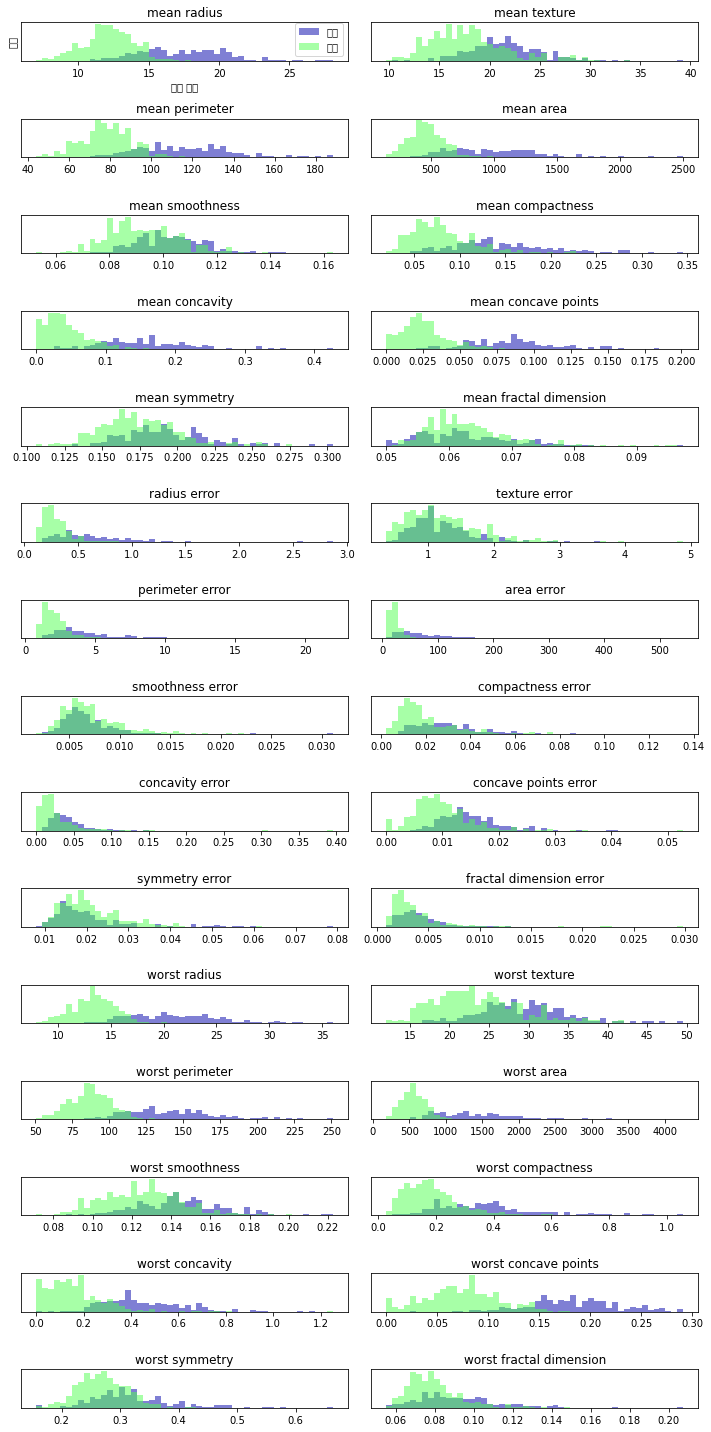

In [ ]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import mglearn

cancer = load_breast_cancer()

fig,axes = plt.subplots(15,2,figsize=(10,20))

malignant = cancer.data[cancer.target==0]

benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):

    _,bins = np.histogram(cancer.data[:,i],bins=50)

    ax[i].hist(malignant[:,i],bins=bins, color=mglearn.cm3(0),alpha=.5)

    ax[i].hist(benign[:,i],bins=bins, color=mglearn.cm3(2),alpha=.5)

    ax[i].set_title(cancer.feature_names[i])

    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

## pca적용 전에 StandardScaler를 사용해 데이터 스케일 조정
두개의 주성분을 사용해 그린 유방암 데이터셋의 2차원 산점도

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


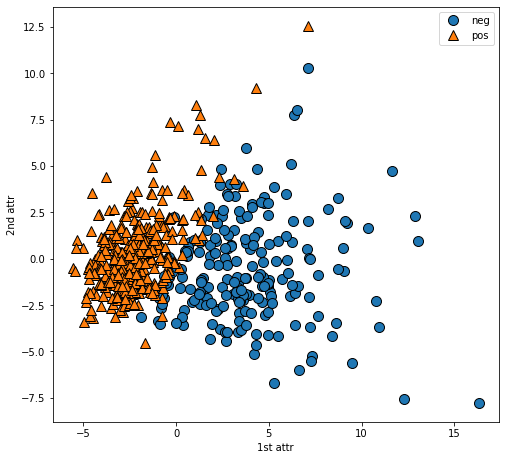

In [ ]:
import matplotlib.pyplot as plt

import mglearn

from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import StandardScaler



cancer = load_breast_cancer()



# StandardScaler를 사용해 각 틍성의 분산이 1이 되도록 스케일 조정

standard_scaler = StandardScaler()

standard_scaler.fit(cancer.data)



X_scaled = standard_scaler.transform(cancer.data)



# PCA 객체를 생성하고 fit메서드를 호출해 주성분을 찾고, transform 메서드를 호출해 데이터를 회전시키고 차원을 축소한다.

# 기본값일때 PCA는 데이터를 회전만 시키고 모든 주성분을 유지한다.

# 데이터의 차원을 줄이려면 PCA 객체를 지정하면 된다.



from sklearn.decomposition import PCA



# 데이터 첫 2개의 성분만 유지한다.

pca = PCA(n_components=2)



# PCA 모델 만들기

pca.fit(X_scaled)



# 처음 두개의 주성분을 사용해 데이터 변환

X_pca = pca.transform(X_scaled)



print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))

print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))

# 원본 데이터 형태 : (569, 30)

# 축소된 데이터 형태 : (569, 2)



# 두개의 주성분을 그래프로 나타내자.

plt.figure(figsize=(8,8))

mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)

plt.legend(["neg","pos"],loc="best")

plt.gca().set_aspect("equal")

plt.xlabel("1st attr")

plt.ylabel("2nd attr")

plt.show()

## components_ 값을 출력

In [ ]:
from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import StandardScaler



cancer = load_breast_cancer()



# StandardScaler를 사용해 각 틍성의 분산이 1이 되도록 스케일 조정

standard_scaler = StandardScaler()

standard_scaler.fit(cancer.data)



X_scaled = standard_scaler.transform(cancer.data)



from sklearn.decomposition import PCA

# 데이터 첫 2개의 성분만 유지한다.

pca = PCA(n_components=2)

# PCA 모델 만들기

pca.fit(X_scaled)



# 처음 두개의 주성분을 사용해 데이터 변환

X_pca = pca.transform(X_scaled)



print("PCA 주성분: {}".format(pca.components_.shape))

print("PCA 주성분: {}".format(pca.components_))

PCA 주성분: (2, 30)
PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


## 유방암 데이터셋에서 찾은 처음 두 개의 주성분 히트맵

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두\xa0번째\xa0주성분')

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_

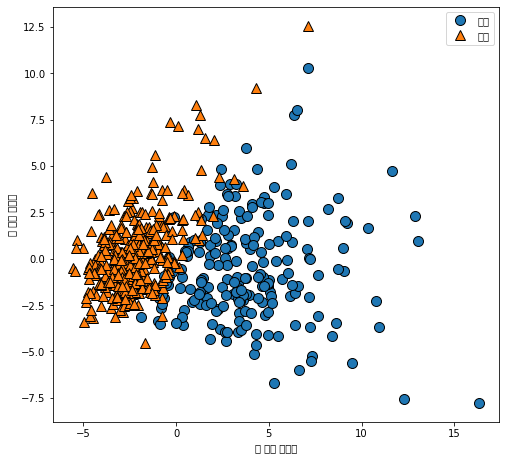

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA



cancer = load_breast_cancer()

# StandardScaler를 사용해 각 틍성의 분산이 1이 되도록 스케일 조정

standard_scaler = StandardScaler()

standard_scaler.fit(cancer.data)



X_scaled = standard_scaler.transform(cancer.data)



# 데이터 첫 2개의 성분만 유지한다.

pca = PCA(n_components=2)



# PCA 모델 만들기

pca.fit(X_scaled)



# 처음 두새의 주성분을 사용해 데이터 변환

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.



plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"],loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

PCA 주성분 형태: (2, 30)
PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


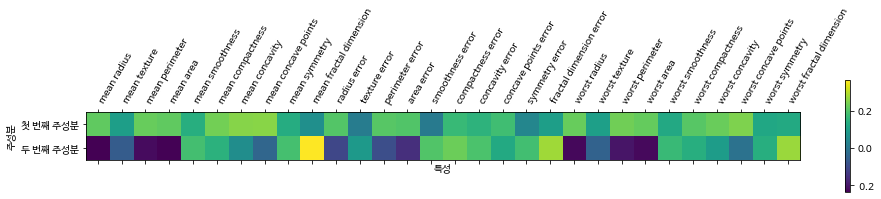

In [ ]:
print("PCA 주성분 형태:", pca.components_.shape)
print("PCA 주성분:", pca.components_)

plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])

plt.colorbar()

plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')

plt.xlabel("특성")

plt.ylabel("주성분")

plt.show()